In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab

In [2]:
data=pd.read_csv('diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Handling missing values

In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
def outlier(data,independent,dependent):
    sns.boxplot(x=dependent,y=independent,data=data,)
    plt.title("Distrbution of %s"%independent)
    plt.xlabel("Outcome")
    plt.show()

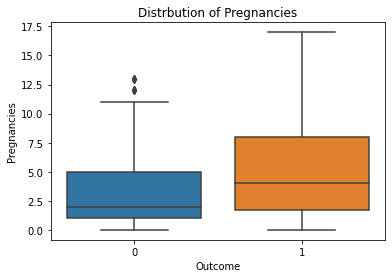

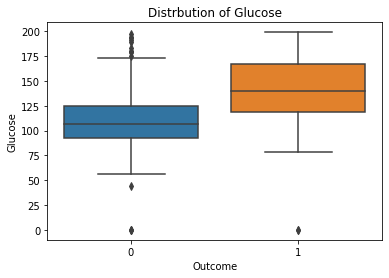

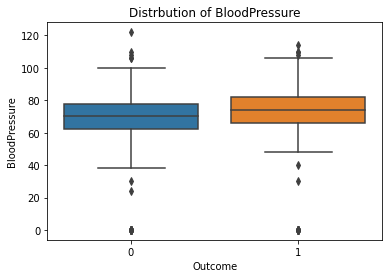

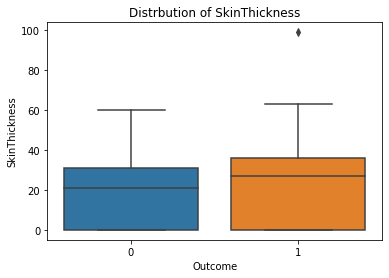

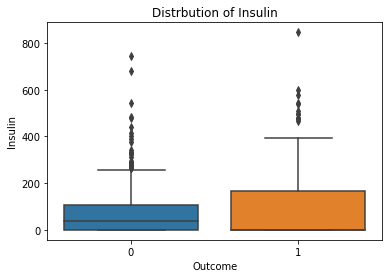

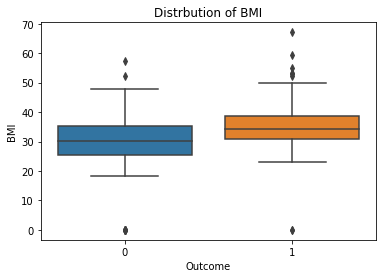

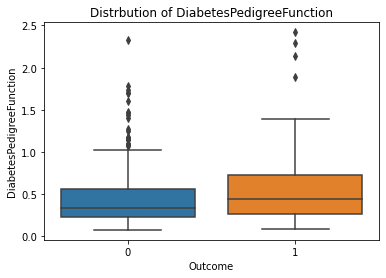

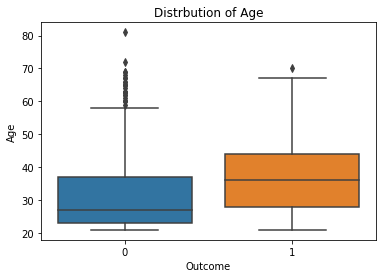

In [5]:
features=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
for feature in features:
    outlier(data,feature,"Outcome")

In [6]:
def distribution(independent):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    data[independent].hist()
    plt.title("Distribution of %s"%independent)
    plt.xlabel(independent)
    plt.subplot(1,2,2)
    stat.probplot(data[independent],dist="norm",plot=pylab)

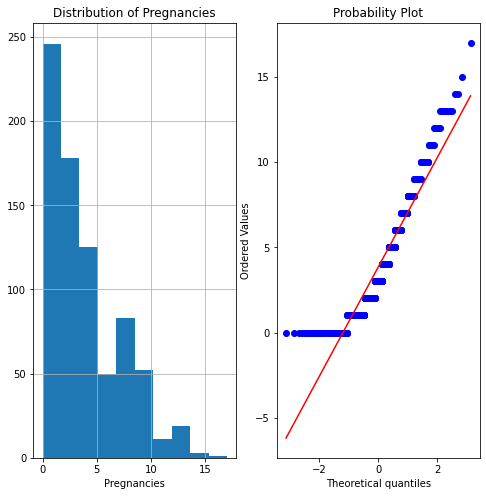

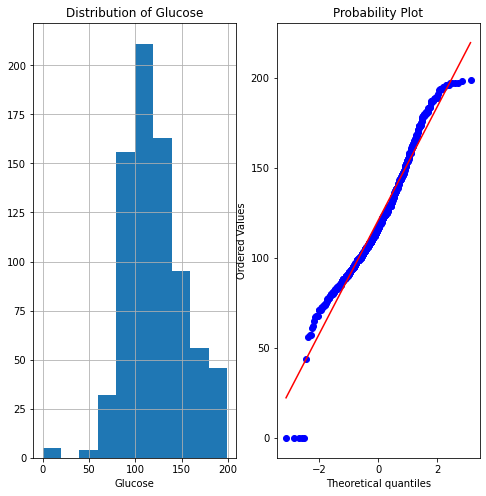

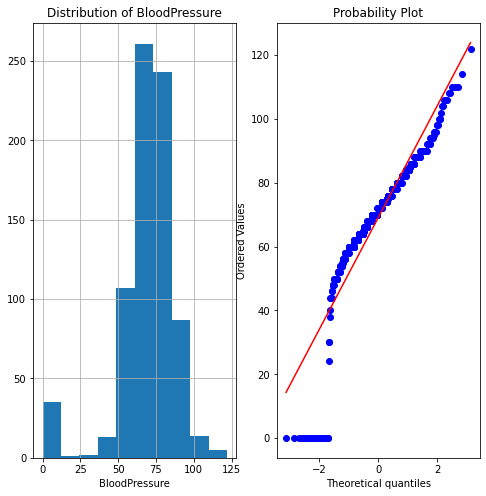

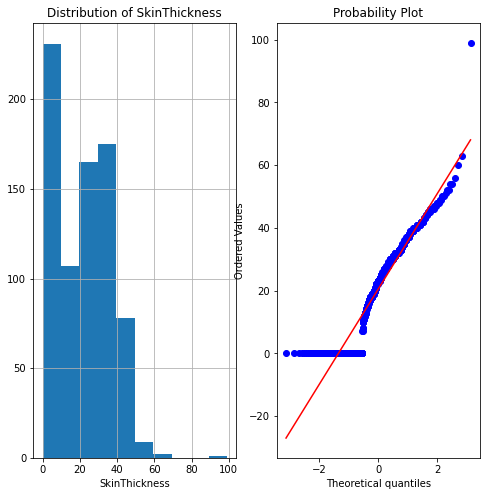

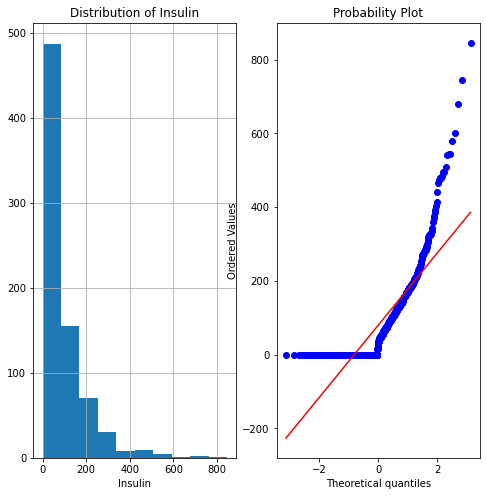

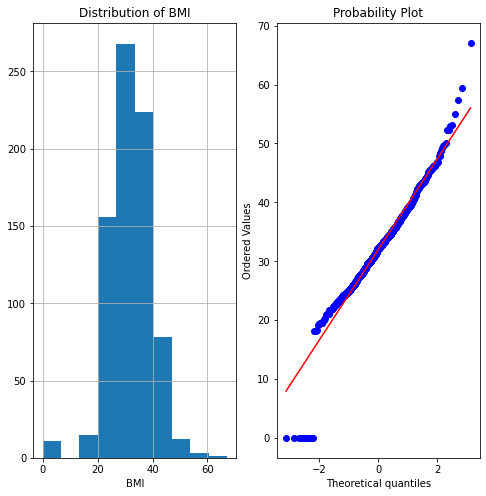

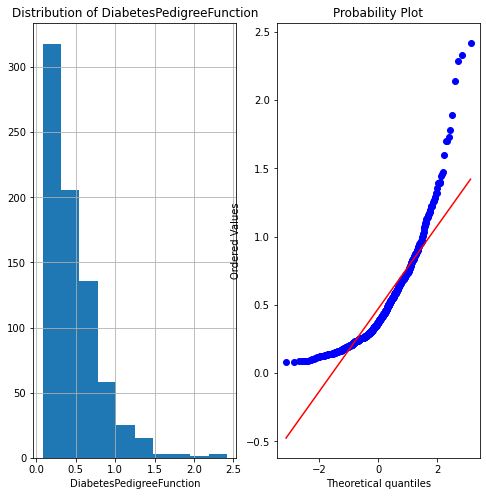

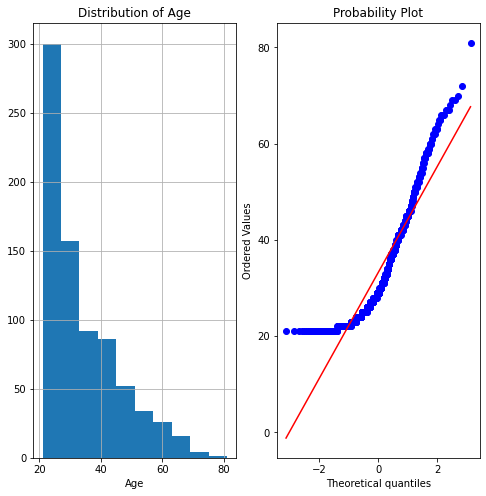

In [7]:
features=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
for feature in features:
    distribution(feature)

#BMI follows normal distritbution.Now we transform remaining features into normal distribution using transformation techniques
1.Log Transformation
2.SquarerootTransformation
3.Reciprocal Transformation
4.Boxcox Transformation
5.exponential Transformation

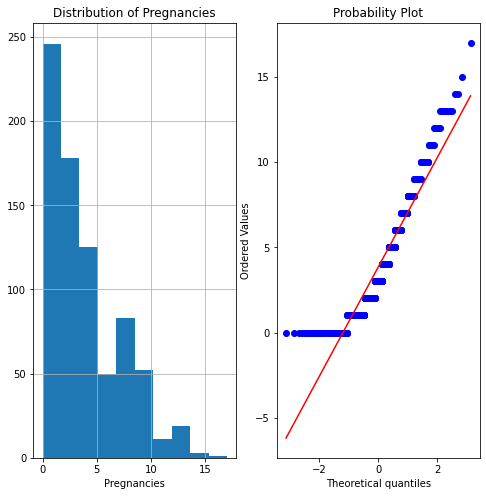

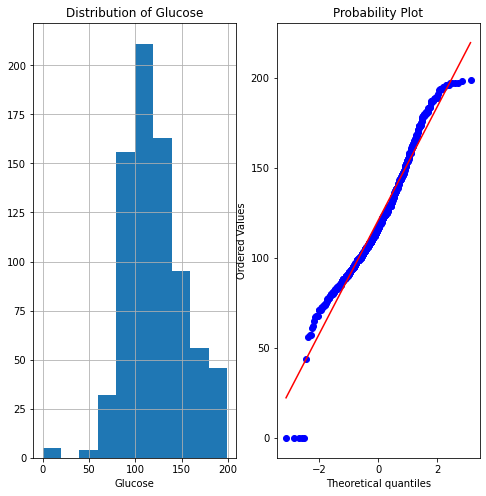

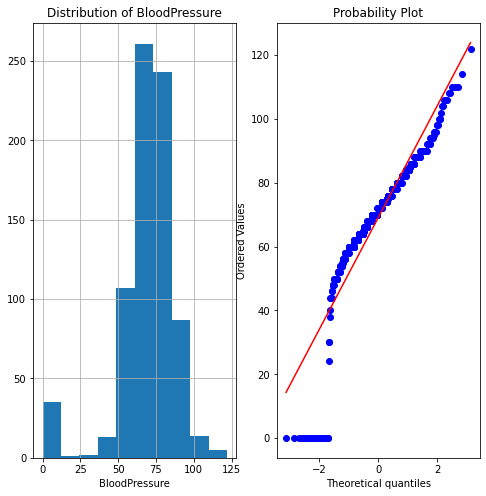

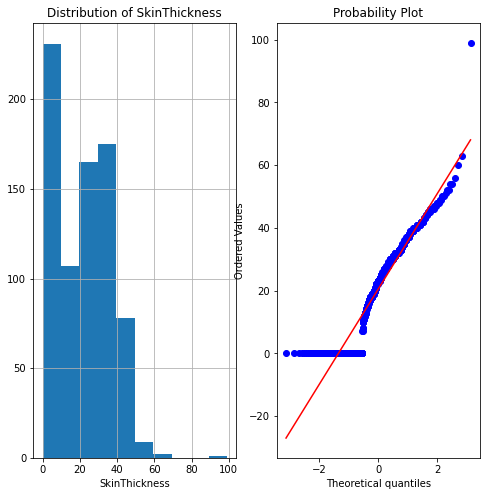

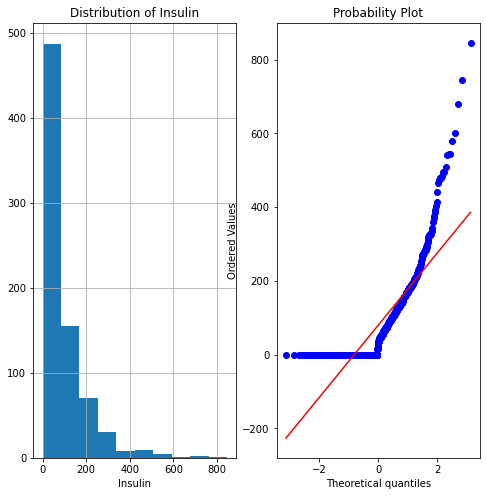

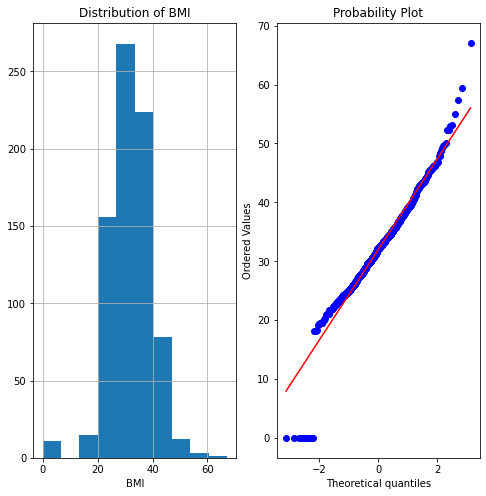

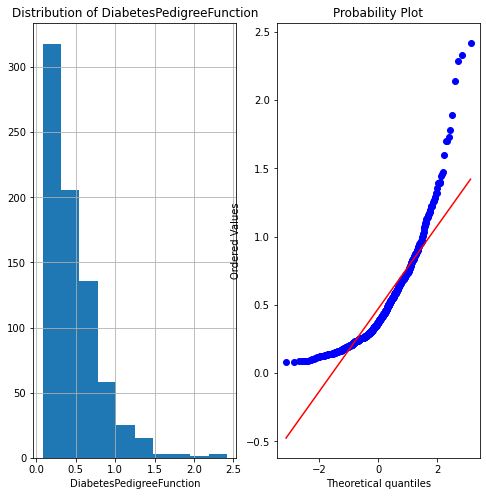

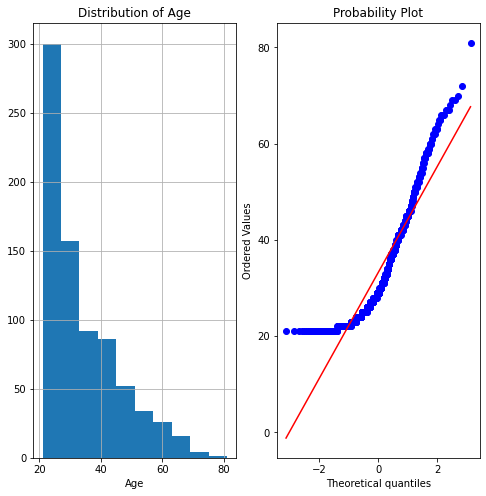

In [8]:
for feature in features:
    df=data.copy()
    df[feature]=np.log(df[feature]+1)
    distribution(feature)

0.1727236286341293
0.9664047405993772
1.6066314687127652
0.5115663433735784
-0.03228486197809822
1.2765663412225114
-2.250386839085635
-1.1496018132013186


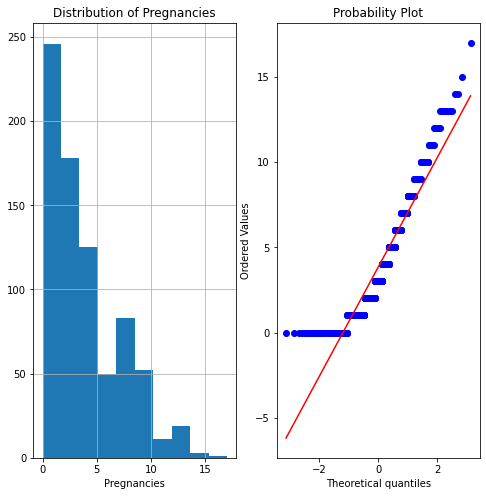

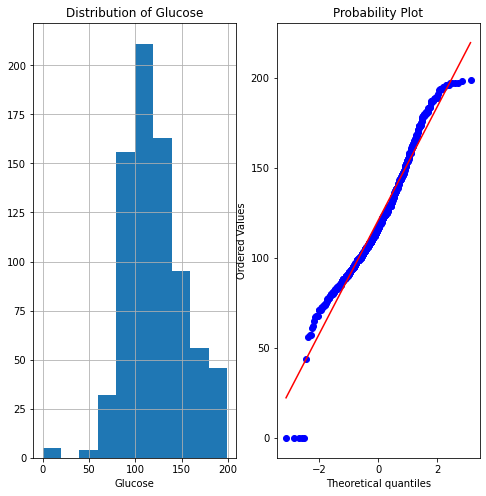

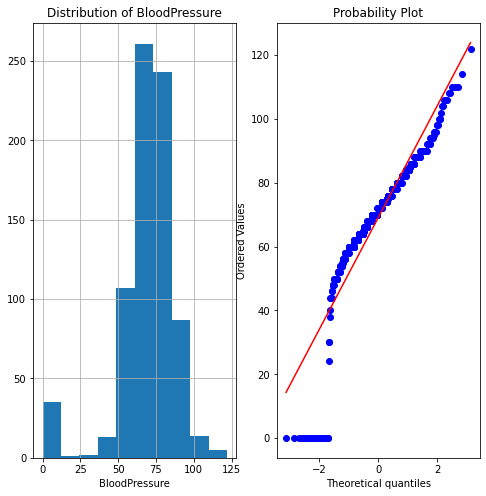

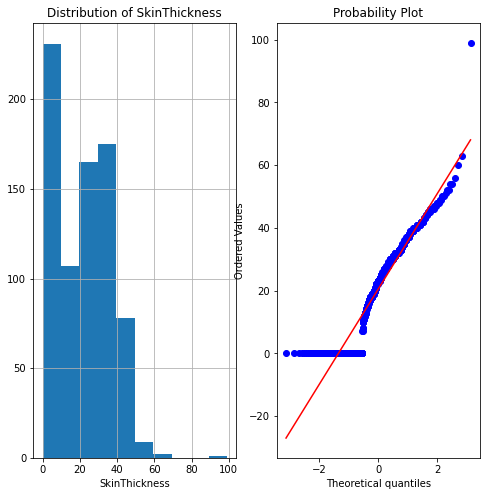

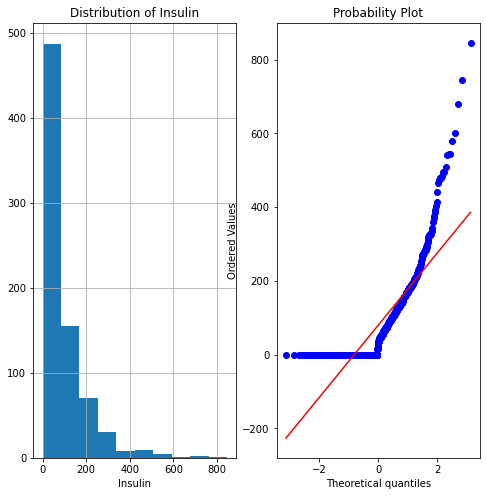

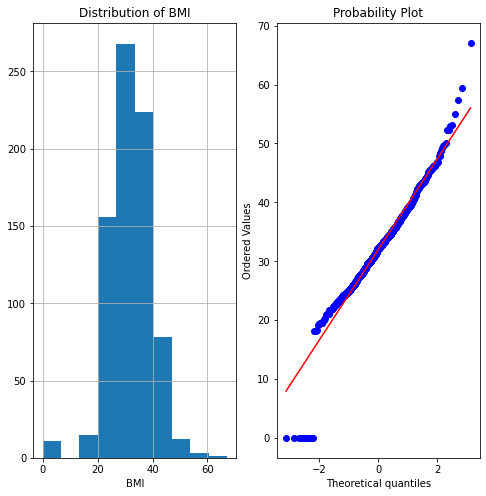

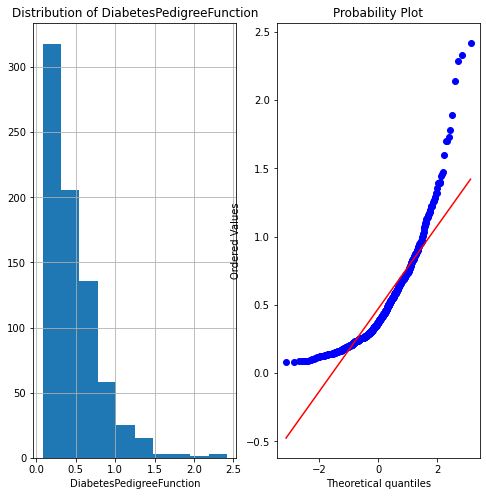

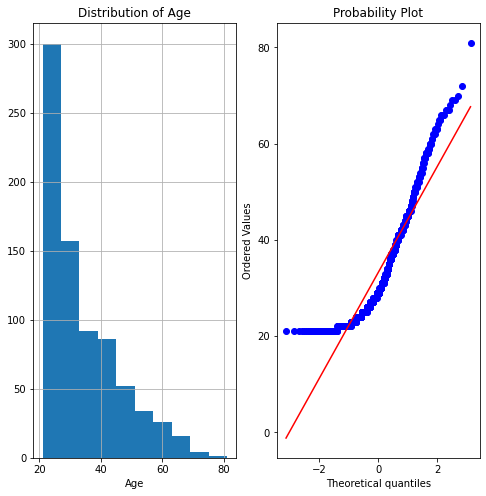

In [9]:
/ for feature in features:
    df2=data.copy()
    df2[feature],param=stat.boxcox(df2[feature]+1)
    print(param)
    distribution(feature)

Here even after applying transformation techniques we would not able to convert them into normal distrbution except BMI feature

Removing outliers for normally distributed features(BMI).we know that in normaldistribution with the 3 rd standard deviation
98 percent of values are there.Here we removing the values which is after the 3rd deviation


In [10]:
upperboundary=data['BMI'].mean()+3*data["BMI"].std()
lowerboundary=data["BMI"].mean()-3*data["BMI"].std()
print("UpperBoundary:",upperboundary)
print("LowerBoundary:",lowerboundary)

UpperBoundary: 55.645059086126295
LowerBoundary: 8.340097163873654


In [11]:
data.loc[data["BMI"]>=50,"BMI"]=50
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#For the features which is skewed
for feature in features:
    if feature not in "BMI":
         IQR=data[feature].quantile(0.75)-data[feature].quantile(0.25)
         print("IQR of %s is %d"%(feature,IQR))

IQR of Pregnancies is 5
IQR of Glucose is 41
IQR of BloodPressure is 18
IQR of SkinThickness is 32
IQR of Insulin is 127
IQR of DiabetesPedigreeFunction is 0
IQR of Age is 17


In [13]:
for feature in features:
    if feature not in "BMI":
        upperboundary=data[feature].quantile(0.25)-(IQR*1.5)
        lowerboundary=data[feature].quantile(0.75)+(IQR*1.5)
        print("Outliers for the %s is %d and %d"%(feature,upperboundary,lowerboundary))

Outliers for the Pregnancies is -24 and 31
Outliers for the Glucose is 73 and 165
Outliers for the BloodPressure is 36 and 105
Outliers for the SkinThickness is -25 and 57
Outliers for the Insulin is -25 and 152
Outliers for the DiabetesPedigreeFunction is -25 and 26
Outliers for the Age is -1 and 66


In [14]:
#Extreme Outliers
for feature in features:
    if feature not in "BMI":
        upperboundary=data[feature].quantile(0.25)-(IQR*3)
        lowerboundary=data[feature].quantile(0.75)+(IQR*3)
        print("Outliers for the %s is %d and %d"%(feature,upperboundary,lowerboundary))
        data.loc[data[feature]>=lowerboundary,feature]=lowerboundary

Outliers for the Pregnancies is -50 and 57
Outliers for the Glucose is 48 and 191
Outliers for the BloodPressure is 11 and 131
Outliers for the SkinThickness is -51 and 83
Outliers for the Insulin is -51 and 178
Outliers for the DiabetesPedigreeFunction is -50 and 51
Outliers for the Age is -27 and 92


In [15]:
y=data[['Outcome']]
x=data.drop(columns=['Outcome'])
x
y1=y['Outcome']
y1

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Normalizing the features

Robustscaler:
    It is used to scale the feature to median and quantiles

In [16]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
data_scaler=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [17]:
data_scaler.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294


In [18]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(data_scaler,y1,test_size=0.2,random_state=0)
train_x.shape

(614, 8)

In [21]:
logistic_model=LogisticRegression()
Grid=GridSearchCV(estimator=logistic_model,param_grid=param,cv=5,scoring='accuracy',n_jobs=-1,verbose=2)
Grid.fit(train_x,train_y)





Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 1785 out of 1800 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:    7.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.001, 0.1, 1.0, 1.5, 3.0],
                         'max_iter': [10, 20, 30, 50, 100],
                         'multi_class': ['auto'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=2)

In [26]:
print(Grid.best_params_)
print(Grid.best_estimator_)

{'C': 0.1, 'max_iter': 10, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.1, max_iter=10, penalty='l1', solver='liblinear')


AccuracyScore: 0.8051948051948052
ROC-AUC Score: 0.85683038377411


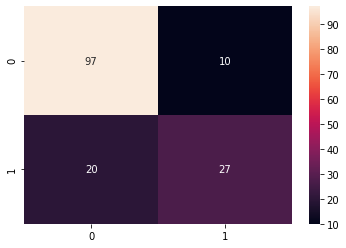

In [22]:


GridSearch=Grid.best_estimator_
pred=GridSearch.predict(test_x)
pred1=GridSearch.predict_proba(test_x)
print("AccuracyScore:",accuracy_score(test_y,pred))
print("ROC-AUC Score:",roc_auc_score(test_y,pred1[:,1]))
sns.heatmap(confusion_matrix(test_y,pred),annot=True)



Hyperparameter tuning for LogisticRegression

In [20]:
param = {"penalty": ["l1","l2" ,"elasticnet" ,"none"],    #Regularization paramater
         "C" : [0.1,0.001,0.1,1.0,1.5 ,3.0],             #strength of regularization
         "solver":["newton-cg", "lbfgs", "liblinear"],
         "multi_class":['auto'],
         "max_iter" :[10,20,30,50,100]
        }

In [ ]:
param = {}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(train_x,train_y)
pred=knn_model.predict(test_x)

print("AccuracyScore:",accuracy_score(test_y,pred))
sns.heatmap(confusion_matrix(test_y,pred),annot=True)


AccuracyScore: 0.8181818181818182


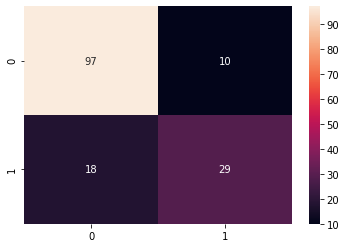

In [23]:
from sklearn.svm import SVC
svc_model=SVC(C=1.0,kernel="linear")
svc_model.fit(train_x,train_y)
pred=svc_model.predict(test_x)
print("AccuracyScore:",accuracy_score(test_y,pred))
sns.heatmap(confusion_matrix(test_y,pred),annot=True)


In [24]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid'] 
C = [0.001,0.005,0.01,0.05, 0.1, 0.5, 1, 5, 10, 50,100,500,1000] 
gamma = [0.001, 0.01, 0.1, 0.5, 1]     
degree =[1,2,3,4]                     
param = {'kernel':kernel , 
         "gamma":gamma,
         "degree": degree,
            "C" :C}

svc = SVC()
svc_grid = GridSearchCV(svc , param_grid = param ,scoring = "accuracy" ,n_jobs = -1 ,verbose = 2 ,cv = 10)
svc_grid.fit(train_x,train_y)




Fitting 10 folds for each of 1040 candidates, totalling 10400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 3144 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 5232 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 6997 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7794 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 8466 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 9120 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 9809 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 10400 out of 10400 | elapsed: 40.0min finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,
                               100, 500, 1000],
                         'degree': [1, 2, 3, 4],
                         'gamma': [0.001, 0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [34]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 0.5, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.5, degree=1, gamma=0.01)


Accuracy_score of Support Vector Classifier:0.8311688311688312


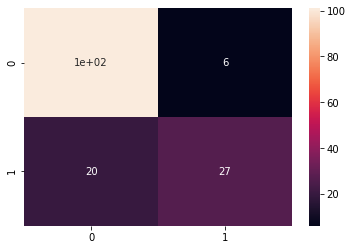

In [43]:
svc_est = svc_grid.best_estimator_
svc_Gr_pred = svc_est.predict(test_x)
svc_accuracy = accuracy_score(test_y , svc_Gr_pred)


print("Accuracy_score of Support Vector Classifier:{}".format(svc_accuracy))
sns.heatmap(confusion_matrix(test_y,svc_Gr_pred),annot=True)


AccuracyScore: 0.7727272727272727


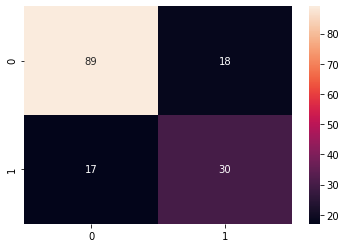

In [35]:
from sklearn.tree import DecisionTreeClassifier
Decision_model=DecisionTreeClassifier(criterion='entropy')
Decision_model.fit(train_x,train_y)
pred=Decision_model.predict(test_x)

print("AccuracyScore:",accuracy_score(test_y,pred))
sns.heatmap(confusion_matrix(test_y,pred),annot=True)


In [48]:
DT = DecisionTreeClassifier()
para ={"criterion" : ['gini', 'entropy'] ,
       "splitter":['best', 'random'] ,
        "max_depth" : [int(x) for x in np.linspace(1, 100,50)],
        'min_samples_split': [2, 5, 10,14],
        'min_samples_leaf' :[1, 2, 4,6,8]}
Dec_grid=GridSearchCV(estimator=DT,param_grid=para,scoring='accuracy',n_jobs=-1,verbose=2).fit(train_x,train_y)
print(Dec_grid.best_params_)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 4200 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 8728 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 14568 tasks      | elapsed:   59.9s


{'criterion': 'entropy', 'max_depth': 83, 'min_samples_leaf': 6, 'min_samples_split': 14, 'splitter': 'random'}


[Parallel(n_jobs=-1)]: Done 20000 out of 20000 | elapsed:  1.2min finished


Accuracy score after Hypertuning is 0.7662337662337663


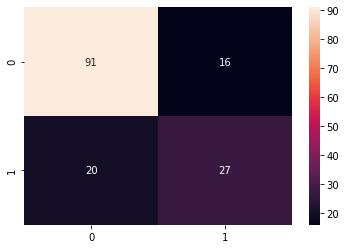

In [52]:
Decision=Dec_grid.best_estimator_
pred=Decision.predict(test_x)
print("Accuracy score after Hypertuning is",accuracy_score(test_y,pred))
sns.heatmap(confusion_matrix(test_y,pred),annot=True)


AccuracyScore: 0.7987012987012987


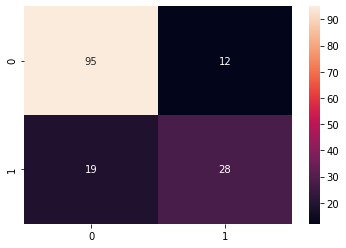

In [36]:
from sklearn.ensemble import RandomForestClassifier
Random_model=RandomForestClassifier(n_estimators=100)
Random_model.fit(train_x,train_y)
pred=Random_model.predict(test_x)

print("AccuracyScore:",accuracy_score(test_y,pred))
sns.heatmap(confusion_matrix(test_y,pred),annot=True)


In [54]:
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 2000, num = 1000)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(1, 1000,500)]
min_samples_split = [2, 5, 10,14,15]
min_samples_leaf = [1, 2, 4,6,8,10,12]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
RF=RandomForestClassifier()
Rf_tuning=RandomizedSearchCV(estimator=RF,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
Rf_tuning.fit(train_x,train_y)
print(Rf_tuning.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.6min finished


{'n_estimators': 804, 'min_samples_split': 5, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': 421, 'criterion': 'entropy'}


Accuracy of RandomForestclassifier after hyper tuning : 0.8246753246753247


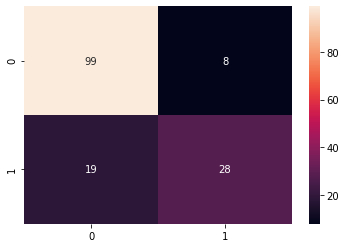

In [61]:
Random=Rf_tuning.best_estimator_
pred=Random.predict(test_x)
print("Accuracy of RandomForestclassifier after hyper tuning :",accuracy_score(test_y,pred))
sns.heatmap(confusion_matrix(test_y,pred),annot=True)


AccuracyScore: 0.7987012987012987


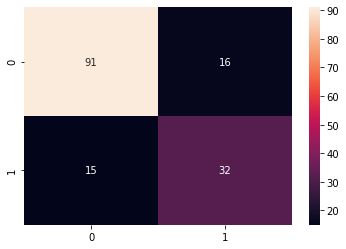

In [37]:
from sklearn.ensemble import AdaBoostClassifier
Random_model=AdaBoostClassifier(n_estimators=100)
Random_model.fit(train_x,train_y)
pred=Random_model.predict(test_x)

print("AccuracyScore:",accuracy_score(test_y,pred))
sns.heatmap(confusion_matrix(test_y,pred),annot=True)


AccuracyScore: 0.7922077922077922


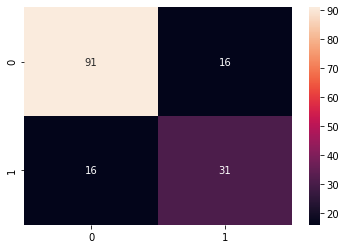

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
Random_model=GradientBoostingClassifier(n_estimators=100)
Random_model.fit(train_x,train_y)
pred=Random_model.predict(test_x)

print("AccuracyScore:",accuracy_score(test_y,pred))
sns.heatmap(confusion_matrix(test_y,pred),annot=True)


In [93]:
criterion : ['friedman_mse', 'mse', 'mae']
loss : ['deviance', 'exponential']
learning_rate : [0.001,0.1,1,0.4,0.5]
n_estimators :  [50,100,150]
max_features : ['auto', 'sqrt', 'log2']
    
para={'criterion': ['friedman_mse', 'mse', 'mae'],
      'loss':['deviance', 'exponential'],
      'learning_rate': [0.001,0.1,1,0.4,0.5],
      'n_estimators':[50,100,150],
      'max_features': ['auto', 'sqrt', 'log2']}


Gradboost=GridSearchCV(estimator=Random_model,param_grid=para,scoring='accuracy',n_jobs=-1,verbose=2)
Gradboost.fit(train_x,train_y)



Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 1096 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  1.5min finished


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.001, 0.1, 1, 0.4, 0.5],
                         'loss': ['deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

Accuracy score after Hyper Tuning: 0.7727272727272727


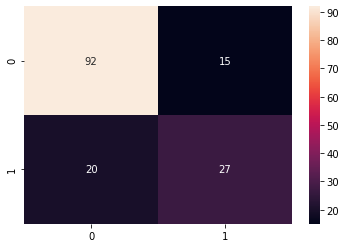

In [91]:
random=Gradboost.best_estimator_
pred=random.predict(test_x)
print("Accuracy score after Hyper Tuning:",accuracy_score(test_y,pred))
sns.heatmap(confusion_matrix(test_y,pred),annot=True)
